<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

## Load data from csv files

In [1]:
import pandas as pd
cust_df = pd.read_csv('Cust_Segmentation.csv')

cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Pre-processing

**Address** in the dataset has categorical values. K-Means algo isn't directly applicable to categorical variables because Eculidean distance function isn't really meaningful for discrete variables.

In [2]:
dfMain = cust_df.drop(['Address'], axis=1)
dfMain.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [6]:
from sklearn.preprocessing import StandardScaler

X = dfMain.values[:, 1:] # drop the customer ID
print(X.shape)
print(dfMain.shape)

(850, 8)
(850, 9)


In [7]:
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [9]:
import numpy as np
X = np.nan_to_num(X)

In [10]:
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [11]:
clustering_Data = StandardScaler().fit_transform(X)
clustering_Data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Modelling

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

In [32]:
import random
clusterNum = 2 #random.randint(3, 6)
print(clusterNum)

2


In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++',
               n_clusters=clusterNum,
               n_init=12)
kmeans.fit(clustering_Data)
labels = kmeans.labels_
print(set(labels)) # 5 classes

{0, 1}


In [34]:
dfMain['Clusters'] = labels
dfMain.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clusters
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [35]:
dfMain.groupby('Clusters').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clusters,,,,,,,,,
0,429.422849,33.054896,1.646884,6.557864,33.942136,0.940387,1.91762,0.261649,9.118694
1,410.477273,42.590909,1.954545,16.255682,95.437500,4.014068,7.52546,0.260563,14.203977


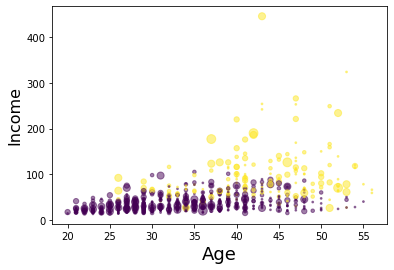

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

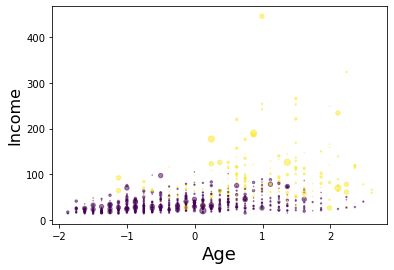

In [37]:
area = np.pi * ( clustering_Data[:, 1])**2  
plt.scatter(clustering_Data[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

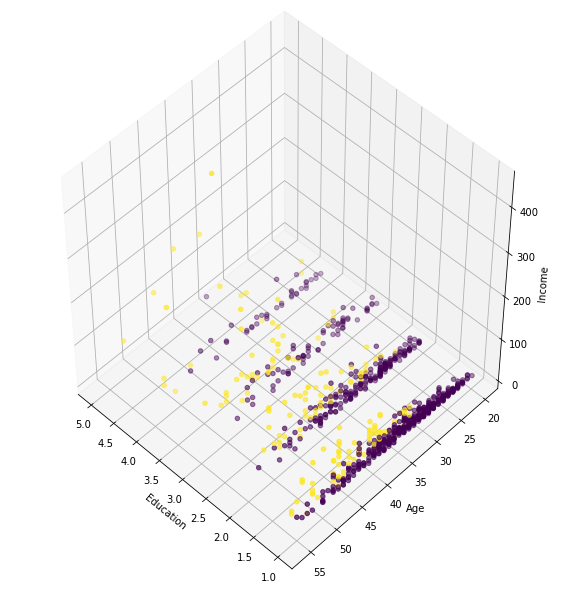

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
plt.cla()

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME